A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

In [107]:
#importing libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [108]:
#load our dataset(No-Show Appointments)
data = pd.read_csv('KaggleV2-May-2016.csv')

In [109]:
#let's take a look on the data
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [110]:
#How many persons didn't show up in their appointments?
data['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

<AxesSubplot:ylabel='No-show'>

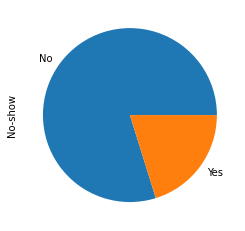

In [111]:
data['No-show'].value_counts().plot(kind='pie')

looks like to be 25% didn't show up!!

In [112]:
#now we need more info about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [113]:
#It seems that no missing data
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Yeah no missing data :)

In [114]:
#let's check for duplicates
data.duplicated().sum()

0

No duplicates

In [115]:
#let's drop "PatientId" and "AppointmentID" columns 
data.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [116]:
#Dtype of "ScheduledDay" and "AppointmentDay" are object, we should turn them to date time
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'].apply(lambda x: x[:10]))
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'].apply(lambda x: x[:10]))

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hipertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handcap         110527 non-null  int64         
 10  SMS_received    110527 non-null  int64         
 11  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


Perfect :)

In [118]:
#maybe we create a new column to know how many days that the patient took to show up
data['TimeDifference'] = data['AppointmentDay'] - data['ScheduledDay']

In [119]:
data['TimeDifference'].head()

0   0 days
1   0 days
2   0 days
3   0 days
4   0 days
Name: TimeDifference, dtype: timedelta64[ns]

We need to remove 'days' word, just numbers

In [120]:
data['TimeDifference'] = data['TimeDifference'].astype(str).str.extract('(\d+)').astype(int)

In [121]:
data['TimeDifference'].head()

0    0
1    0
2    0
3    0
4    0
Name: TimeDifference, dtype: int32

In [122]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeDifference
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


array([[<AxesSubplot:title={'center':'ScheduledDay'}>,
        <AxesSubplot:title={'center':'AppointmentDay'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>],
       [<AxesSubplot:title={'center':'TimeDifference'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

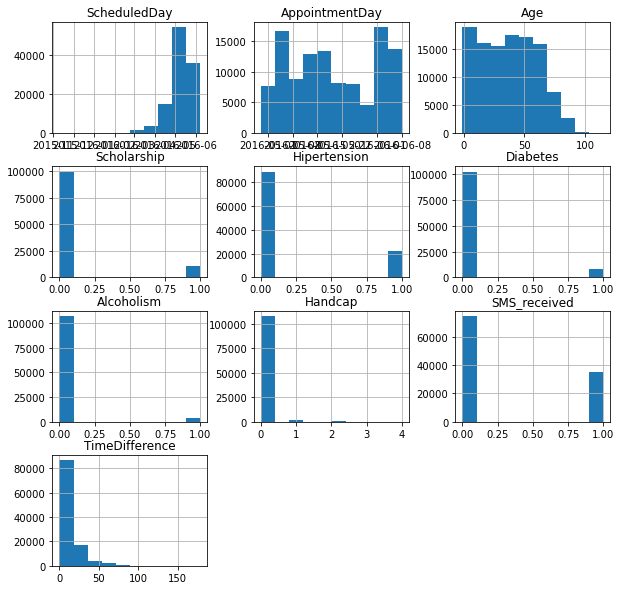

In [123]:
#let's show the histograms
data.hist(figsize=(10, 10))

Now let's answer some questions

# Question 1: Who sticks to the appointments more, men or women?

In [124]:
data_with_showup = data[data['No-show'] == 'No']

In [125]:
#numbers of men and women they show up
data_with_showup['Gender'].value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

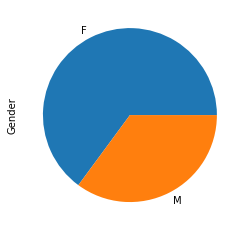

In [126]:
data_with_showup['Gender'].value_counts().plot(kind='pie')

It seems that women sticks to their appointments more than men.

# Question 2: Are Patients that received an SMS show up?

In [127]:
data_with_showup['SMS_received'].value_counts()

0    62510
1    25698
Name: SMS_received, dtype: int64

<AxesSubplot:ylabel='SMS_received'>

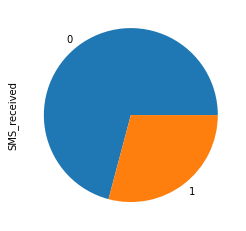

In [128]:
data_with_showup['SMS_received'].value_counts().plot(kind='pie')

It seems that a third of those who showed up had already received an SMS!!

Maybe there is another reason more effective that make patients show up

# Question 3: Are Patients with chronic diseases show up?

In [129]:
data_with_showup[['Hipertension', 'Diabetes', 'Alcoholism']].head()

,Hipertension,Diabetes,Alcoholism
0,1,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,1,0


array([[<AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>, <AxesSubplot:>]],
      dtype=object)

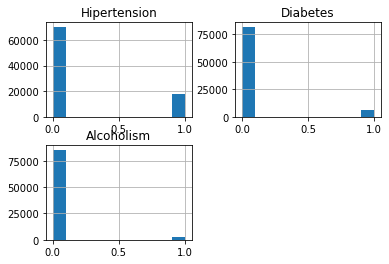

In [130]:
data_with_showup[['Hipertension', 'Diabetes', 'Alcoholism']].hist()

In [131]:
data_with_showup['Hipertension'].value_counts()

0    70179
1    18029
Name: Hipertension, dtype: int64

25% of Patients that show up had Hipertension

# Question 4: Where are Patients come from?

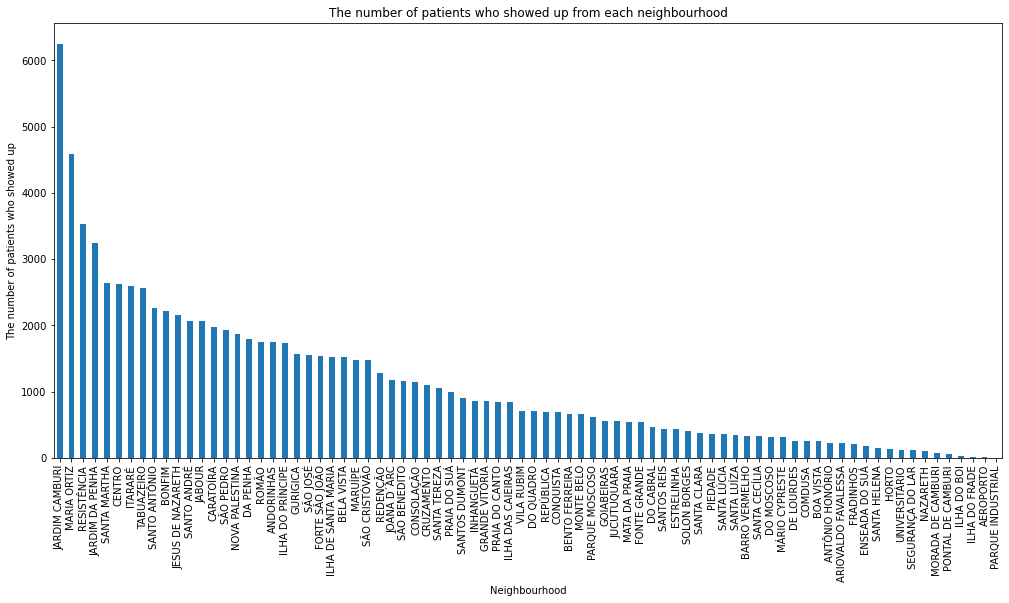

In [132]:
data_with_showup['Neighbourhood'].value_counts().plot(kind='bar', figsize=(17, 8))
plt.title("The number of patients who showed up from each neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("The number of patients who showed up");

It seems that Jardim Camburi is so close to the clinic

# Question 5: Is Scholarship effect on show-up appointments?

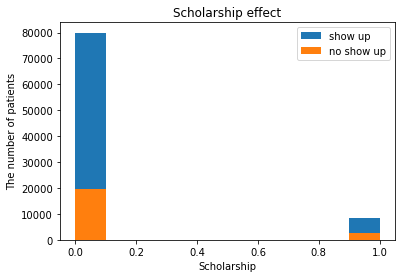

In [133]:
data_with_no_showup = data[data['No-show'] == 'Yes']

data_with_showup['Scholarship'].plot(kind='hist', label='show up')
data_with_no_showup['Scholarship'].plot(kind='hist', label='no show up')
plt.legend()
plt.title("Scholarship effect")
plt.xlabel("Scholarship")
plt.ylabel("The number of patients");

It seems that The effect of the scholarship on show up was so weak

# The conclusions

- Women are the most patients stick to their appointments.
- A third of those who showed up had already received an SMS, so It isn't an effective way.
- 25% of Patients that show up had Hipertension, It could be an incentive.
- Most of the patients come from Jardim Camburi, It seems that it is so close to the clinic.
- The effect of the scholarship on show up was so weak.

# Limitations 

- We didn't find any missing data.
- We didn't find any duplicates.
- We drop "PatientId" and "AppointmentID" columns to improve our analysis.
- We changed dtype of "ScheduledDay" and "AppointmentDay" from object to date time.